In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from scipy.stats import gaussian_kde
from matplotlib import rcParams as rc

# generate toy data for TOV
def gen_TOV_samples(mean, std_dev, n_samples):
    samples = np.random.normal(loc=mean, scale=std_dev, size=n_samples)
    return samples

# use Monte carlo methods to compute the new masses with rotation
def gen_ROT_samples(TOV_samples,R_mean,R_error):
    mR_samples = []
    for i in range(len(TOV_samples)):
        mR_samples.append(TOV_samples[i]*np.random.normal(loc=R_mean,scale=R_error,size=1)[0])
    return mR_samples

# calculates a random integer from 0 to N
def random_int(upper_limit):
    return random.randint(0,upper_limit)

# Computes the probability of that the observed measurement is described by the theoretical value
# using Monte carlo sampling
def MC_prob(the_samples, exp_samples, nruns):
    # Monte Carlo code to compute probability
    count = 0
    diff_array = []
    for i in range(nruns):
        rTh = random_int(len(the_samples)-1)
        rEx = random_int(len(exp_samples)-1)
        mTh = the_samples[rTh]
        mEx = exp_samples[rEx]
        diff = mTh-mEx
        diff_array.append(diff)
        if (diff>0):
            count = count + 1

    prob = count/nruns
    return prob, diff_array

# Using the probability function, obtain a sampling array of the experimental measurement from LIGO
# uses accept/reject sampling
def gen_exp_samples(file,npoints):
    prob_func = np.loadtxt(file)
    size = len(prob_func)

    exp_masses = []
    for i in range(npoints):
        index = random_int(size-1)
        r = random.random()
        p = prob_func[index][1]
        mass = prob_func[index][0]
        if (r<p):
            exp_masses.append(mass)
    return exp_masses

def gen_KDE(samples, npoints, smooth_factor):
    kde = gaussian_kde(samples,bw_method=smooth_factor)
    x = np.linspace(min(samples),max(samples),npoints)
    kde_values = kde(x)
    return x, kde_values

In [22]:

# define number of samples in samplings
N_samples = 100000

# define the mass increase factors with rotation
rot_factor = 1.260
rot_error = 0.04

# import TOV masses
mTOV_samples = np.loadtxt("MCMC_complete_28.txt")[:,17]

# generate maximum masses with rotation
mMAX_samples = gen_ROT_samples(mTOV_samples,rot_factor,rot_error)

# generate EXP masses
mEXP_samples = gen_exp_samples("mass_hs_data.txt",N_samples)

# compute probability
prob, diff = MC_prob(mMAX_samples,mEXP_samples,N_samples)
print(prob)

0.35671


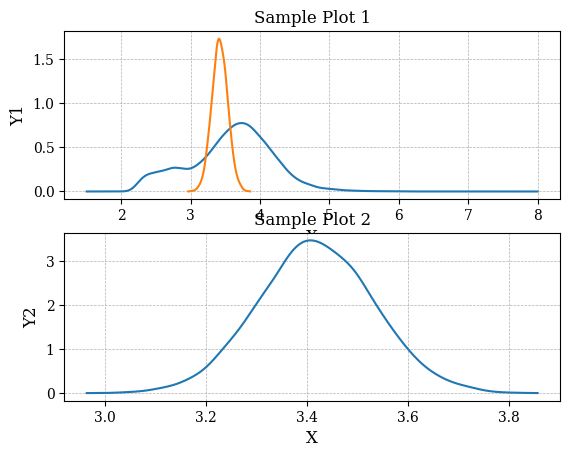

<Figure size 650x2050 with 0 Axes>

In [33]:


exp_data = np.loadtxt("mass_hs_data.txt")

import matplotlib.pyplot as plt
import matplotlib  # For rcParams access

# Sample data (replace with your actual data)
xmax, ymax = gen_KDE(mMAX_samples,1000,0.2)

# Set a common font for plots (e.g., serif font for professional look)
plt.rcParams['font.family'] = 'serif'  # Adjust 'serif' to 'sans-serif' if preferred

# Create the subplots with adjusted spacing
fig, (ax1, ax2) = plt.subplots(2, 1)  # No need to specify figsize again

# Adjust figure size for a two-column format (typical journal width ~7 inches)
plt.figure(figsize=(6.5, 20.5))  # Adjust height as needed

# Plot data on each subplot
ax1.plot(exp_data[:,0], exp_data[:,1], label="Sine")
ax1.plot(xmax, ymax/2, label="Sine")
ax2.plot(xmax, ymax, label="Cosine")

# Customize plot elements for a clean look
ax1.set_title("Sample Plot 1", fontsize=12)
ax2.set_title("Sample Plot 2", fontsize=12)
ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("Y1", fontsize=12)
ax2.set_xlabel("X", fontsize=12)
ax2.set_ylabel("Y2", fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlapping elements (optional)
plt.tight_layout()

# Show the plot
plt.show()
